<b>WORKFLOW :</b>
<ol>
    <li>Load Data</li>
<li>Check Missing Values ( If Exist ; Fill each record with mean of its feature )</li>
<li>Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).</li>
<li>Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).</li>
<li>Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)</li>
<li>Train the Model with Epochs (100) and validate it</li>
<li>If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .</li>
<li>Evaluation Step</li>
<li>Prediction </li>
</ol>

In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import matplotlib #collection of functions for scientific and publication-ready visualization
import numpy as np #foundational package for scientific computing
import scipy as sp #collection of functions for scientific computing and advance mathematics
import IPython 
from IPython import display #pretty printing of dataframes in Jupyter notebook
import sklearn #collection of machine learning algorithms

#misc libraries
import random
import time


#ignore warnings
import warnings
import math

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, LabelBinarizer, MaxAbsScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend

# 1. Load Data

In [5]:
concrete_df = pd.read_csv('input/compresive_strength_concrete.csv')
print (concrete_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


# 2. Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [6]:
print('Concrete data columns with null values:\n', concrete_df.isnull().sum())
print("-"*10)

concrete_df.describe(include = 'all')

Concrete data columns with null values:
 Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64
----------


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
concrete_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
dataset = concrete_df.values
X = dataset[:,0:-1].astype(float)
Y = dataset[:,-1]

In [9]:
X

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [10]:
Y

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

In [11]:
seed=7
num_epochs = 100
num_batch = 320
#encoded_Y

# 3. Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 Y,
                                                 test_size=0.30,
                                                 random_state=seed)

In [13]:
sc = StandardScaler()
#encoded_Y = label.fit_transform(Y.reshape(1, -1)).reshape(1, -1)
#encoded_Y = Y/np.amax(Y)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# 4. Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

# 5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

In [21]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(6, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))
    # Optimize , Compile And Train The Model 
    opt =Adam(lr=0.0015)
    model.compile(optimizer = opt,#
              loss='mean_squared_error',
              metrics=[rmse])
    return model

In [22]:
model=create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
batch_normalization_3 (Batch (None, 6)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

# 6. Train the Model with Epochs (100) and validate it

# 7. If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

In [23]:
history= model.fit(X_train,y_train,verbose=2,shuffle=True,nb_epoch=num_epochs,batch_size=num_batch,validation_split=0.2)

Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 - 3s - loss: 1574.1859 - rmse: 36.0907 - val_loss: 1575.6925 - val_rmse: 35.8406
Epoch 2/100
576/576 - 0s - loss: 1571.9946 - rmse: 36.0790 - val_loss: 1575.1494 - val_rmse: 35.8339
Epoch 3/100
576/576 - 0s - loss: 1569.9619 - rmse: 36.0673 - val_loss: 1574.4380 - val_rmse: 35.8252
Epoch 4/100
576/576 - 0s - loss: 1567.7366 - rmse: 36.0555 - val_loss: 1573.6921 - val_rmse: 35.8162
Epoch 5/100
576/576 - 0s - loss: 1565.6823 - rmse: 36.0437 - val_loss: 1572.8994 - val_rmse: 35.8066
Epoch 6/100
576/576 - 0s - loss: 1563.3604 - rmse: 36.0317 - val_loss: 1572.0057 - val_rmse: 35.7958
Epoch 7/100
576/576 - 0s - loss: 1561.4311 - rmse: 36.0196 - val_loss: 1571.1304 - val_rmse: 35.7854
Epoch 8/100
576/576 - 0s - loss: 1559.2566 - rmse: 36.0074 - val_loss: 1570.2802 - val_rmse: 35.7755
Epoch 9/100
576/576 - 0s - loss: 1556.9133 - rmse: 35.9950 - val_loss: 1569.3975 - val_rmse: 35.7655
Epoch 10/100
576/576 - 0s - loss: 1554.8875 -

Epoch 81/100
576/576 - 0s - loss: 1361.3940 - rmse: 34.6040 - val_loss: 1295.7131 - val_rmse: 33.0454
Epoch 82/100
576/576 - 0s - loss: 1358.6932 - rmse: 34.5770 - val_loss: 1289.8413 - val_rmse: 32.9794
Epoch 83/100
576/576 - 0s - loss: 1355.5077 - rmse: 34.5498 - val_loss: 1283.7979 - val_rmse: 32.9112
Epoch 84/100
576/576 - 0s - loss: 1352.3166 - rmse: 34.5224 - val_loss: 1278.1604 - val_rmse: 32.8470
Epoch 85/100
576/576 - 0s - loss: 1349.1568 - rmse: 34.4947 - val_loss: 1272.4598 - val_rmse: 32.7826
Epoch 86/100
576/576 - 0s - loss: 1345.9355 - rmse: 34.4668 - val_loss: 1267.0806 - val_rmse: 32.7226
Epoch 87/100
576/576 - 0s - loss: 1342.8070 - rmse: 34.4387 - val_loss: 1261.7048 - val_rmse: 32.6638
Epoch 88/100
576/576 - 0s - loss: 1339.6577 - rmse: 34.4104 - val_loss: 1256.5387 - val_rmse: 32.6082
Epoch 89/100
576/576 - 0s - loss: 1336.4173 - rmse: 34.3819 - val_loss: 1251.4302 - val_rmse: 32.5520
Epoch 90/100
576/576 - 0s - loss: 1333.8780 - rmse: 34.3533 - val_loss: 1246.2157 

# 8.Evaluation Step

In [24]:
test_error_rate = model.evaluate(X_test, y_test, verbose=2)
test_error_rate

309/309 - 0s - loss: 1134.2280 - rmse: 31.2787


[1134.2280012704794, 31.27872]

# 9. Prediction

In [25]:
# Predicting and Finding R Squared Score

y_predict = model.predict(X_test)

print(r2_score(y_test,y_predict))

-3.164915547684462


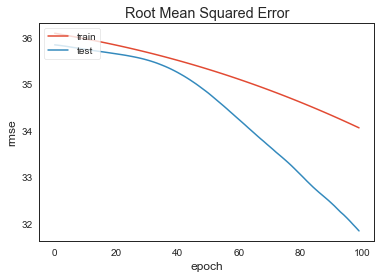

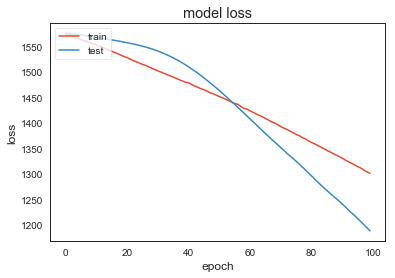

In [26]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()